In [1]:
pip install scikit-learn

In [2]:
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 35.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [3]:
!pip install --upgrade scikit-learn
!pip install --upgrade category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 52.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, balanced_accuracy_score
from category_encoders import TargetEncoder

%matplotlib inline
sns.set(color_codes=True)
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/adverts.csv')

In [7]:
#df = pd.read_csv('E:\\MMU Study\\ML\\adverts.csv')

In [8]:
df.head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [9]:
df.tail(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


In [10]:
df.dtypes

,0
public_reference,int64
mileage,float64
reg_code,object
standard_colour,object
standard_make,object
standard_model,object
vehicle_condition,object
year_of_registration,float64
price,int64
body_type,object


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [12]:
df.nunique()

,0
public_reference,402005
mileage,80634
reg_code,72
standard_colour,22
standard_make,110
standard_model,1168
vehicle_condition,2
year_of_registration,84
price,30578
body_type,16


In [13]:
df.isnull().sum()

,0
public_reference,0
mileage,127
reg_code,31857
standard_colour,5378
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,33311
price,0
body_type,837


In [14]:
numeric_data = df.select_dtypes(include=['int64', 'float64']).columns
discrete_features = df.select_dtypes(include=['object', 'bool']).columns

print(f"Numeric data: {numeric_data}", "\n" f"Discrete Features: {discrete_features}")

Numeric data: Index(['public_reference', 'mileage', 'year_of_registration', 'price'], dtype='object') 
Discrete Features: Index(['reg_code', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type'],
      dtype='object')


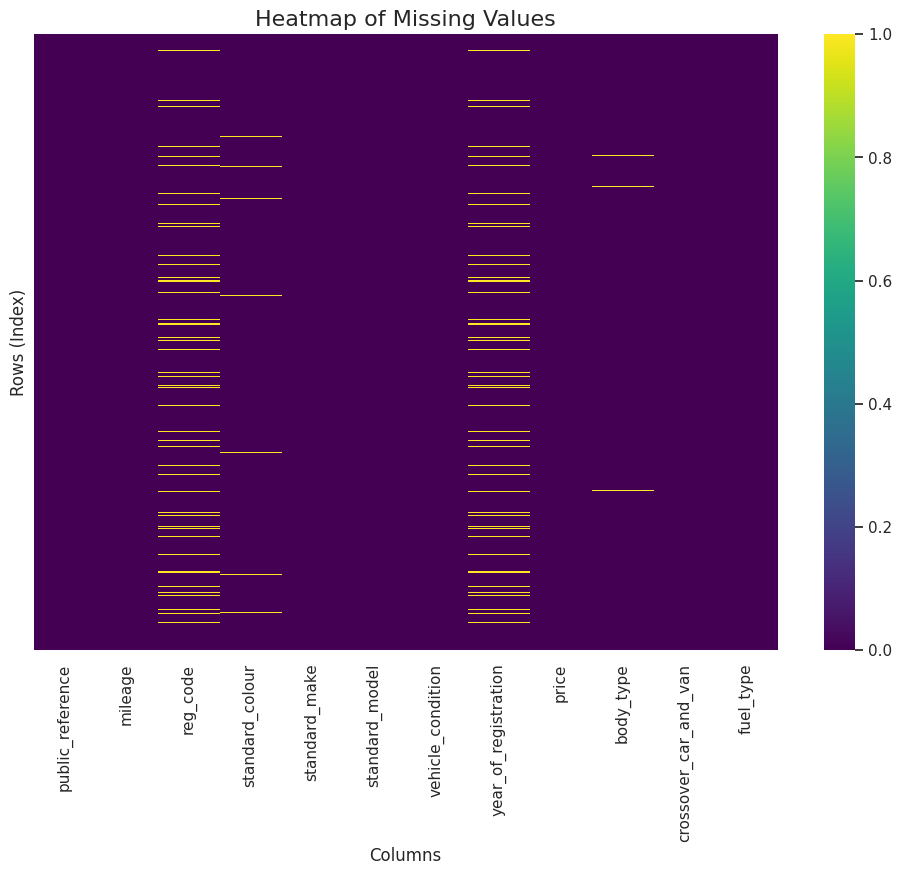

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title("Heatmap of Missing Values", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows (Index)", fontsize=12)
plt.show()

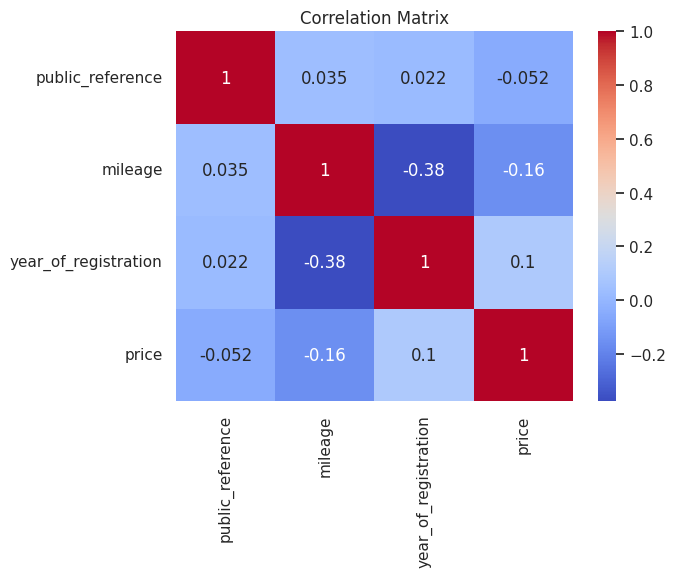

In [16]:
quantitative_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[quantitative_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

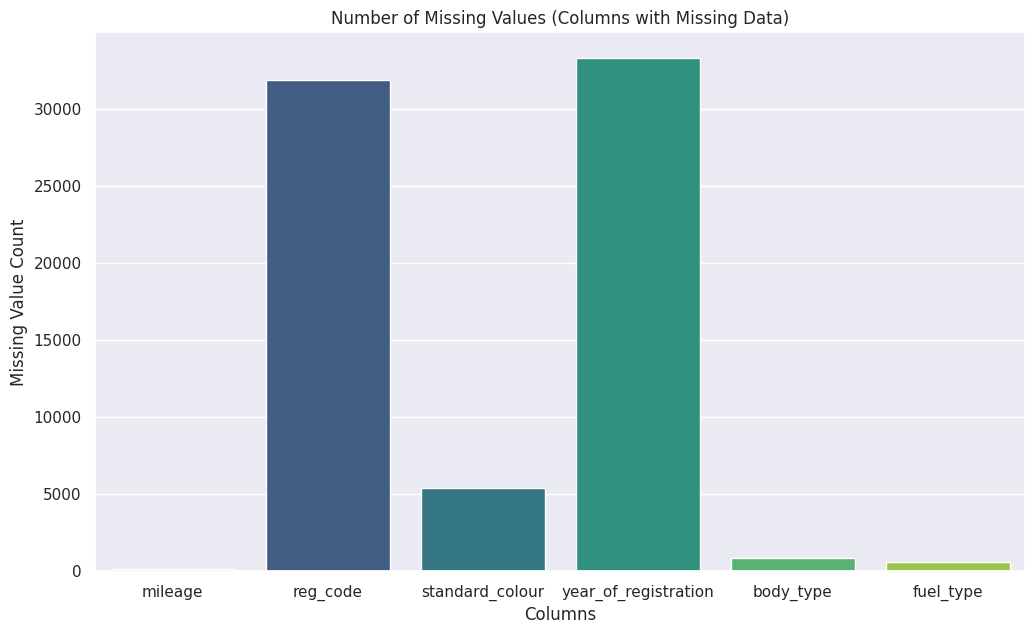

In [17]:
missing_counts = df.isnull().sum()

# Filter columns with missing values
missing_counts = missing_counts[missing_counts > 0]

# Plot a bar graph
plt.figure(figsize=(12, 7))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")
plt.title("Number of Missing Values (Columns with Missing Data)")
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.show()

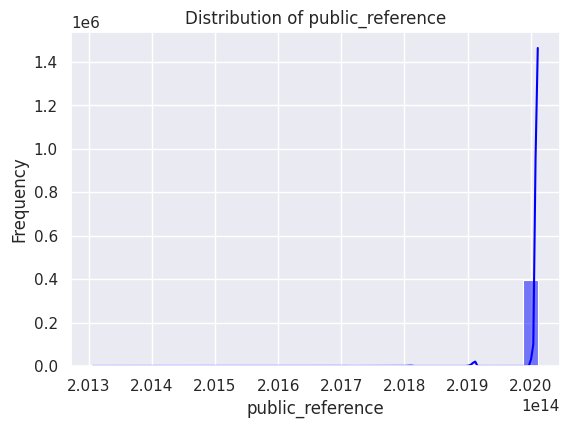

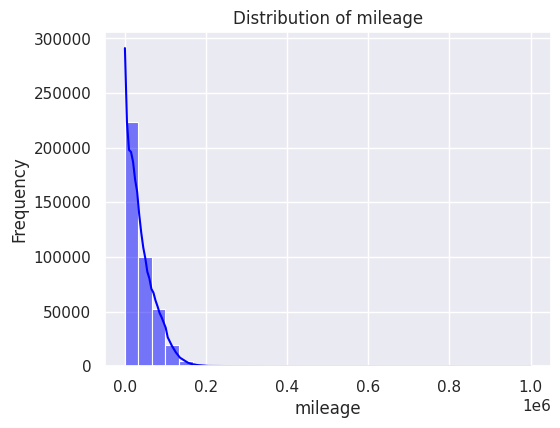

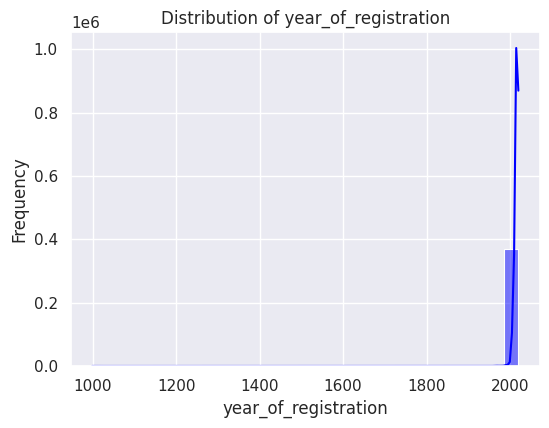

In [18]:
for i, column in enumerate(numeric_data, 1):
    if column != 'price':
        plt.figure(figsize=(16, 12))
        plt.subplot(3, 3, i)
        sns.histplot(df[column], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

Skipping 'reg_code' due to too many unique values (72).
Skipping 'standard_colour' due to too many unique values (22).
Skipping 'standard_make' due to too many unique values (110).
Skipping 'standard_model' due to too many unique values (1168).


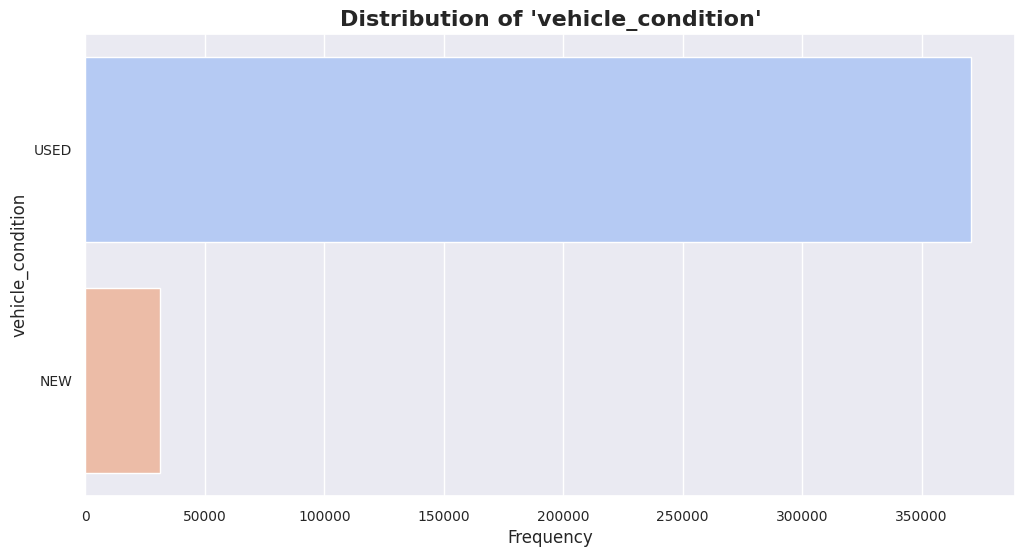

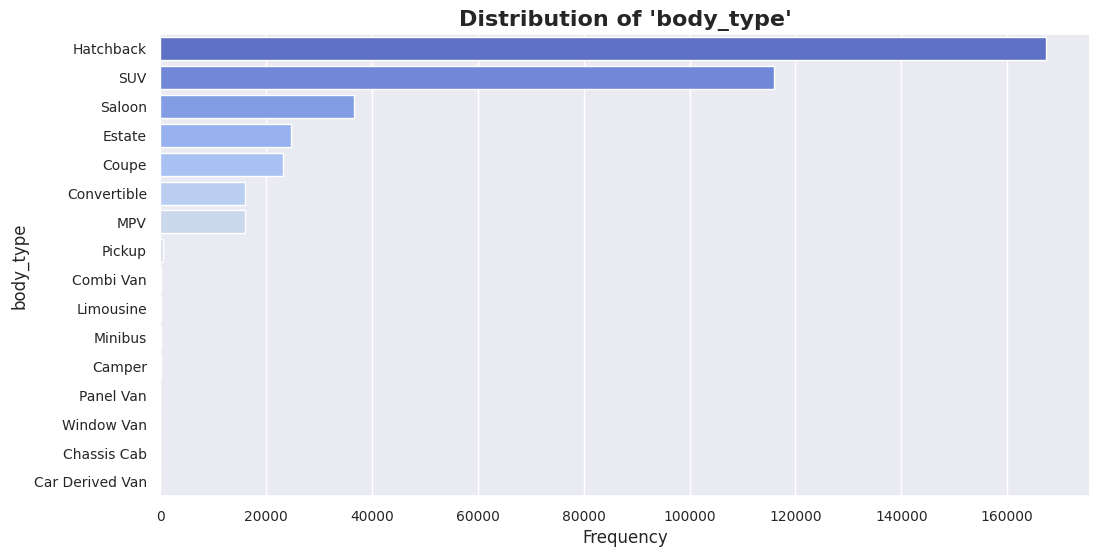

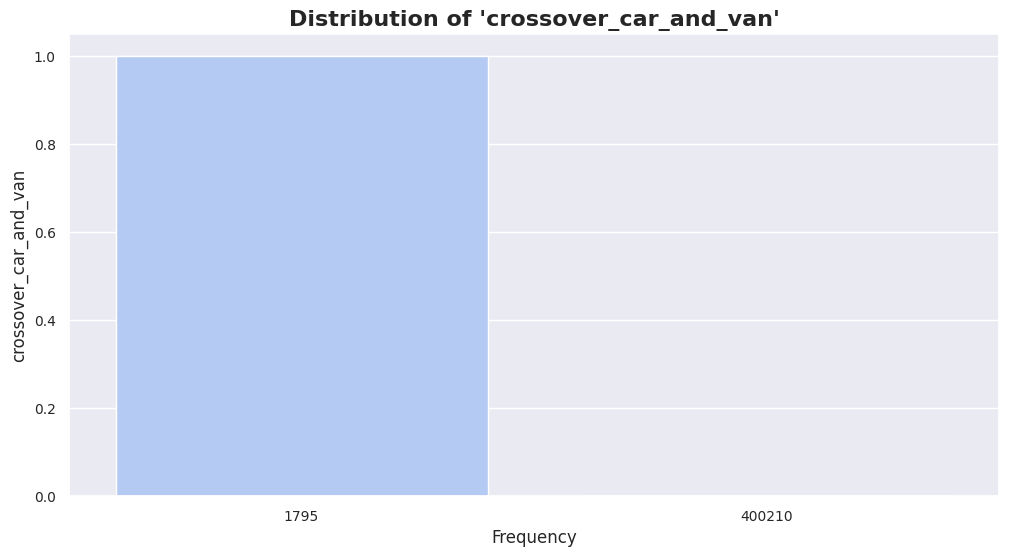

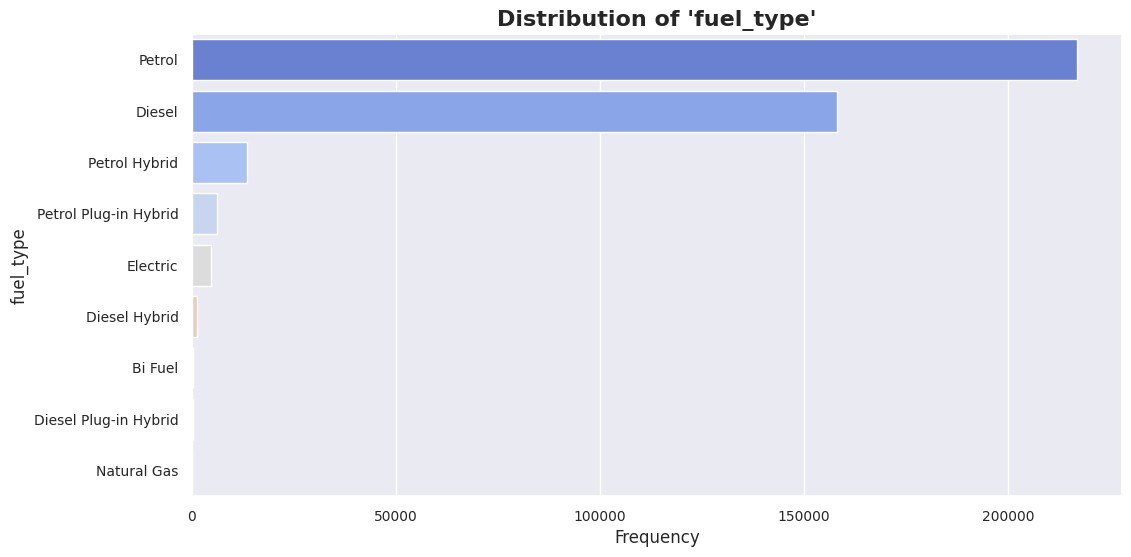

In [19]:
for column in discrete_features:
    unique_values = df[column].nunique()
    if unique_values <= 20:
        plt.figure(figsize=(12, 6))
        sns.barplot(
            x=df[column].value_counts().values,
            y=df[column].value_counts().index,
            palette="coolwarm",
        )
        plt.title(f"Distribution of '{column}'", fontsize=16, fontweight="bold")
        plt.xlabel("Frequency", fontsize=12)
        plt.ylabel(f"{column}", fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
    else:
        print(f"Skipping '{column}' due to too many unique values ({unique_values}).")

Unique colours: ['Grey' 'Blue' 'Brown' 'Red' 'Bronze' 'Black' 'White' 'Silver' nan
 'Purple' 'Green' 'Orange' 'Yellow' 'Turquoise' 'Gold' 'Multicolour'
 'Beige' 'Burgundy' 'Pink' 'Maroon' 'Magenta' 'Navy' 'Indigo']


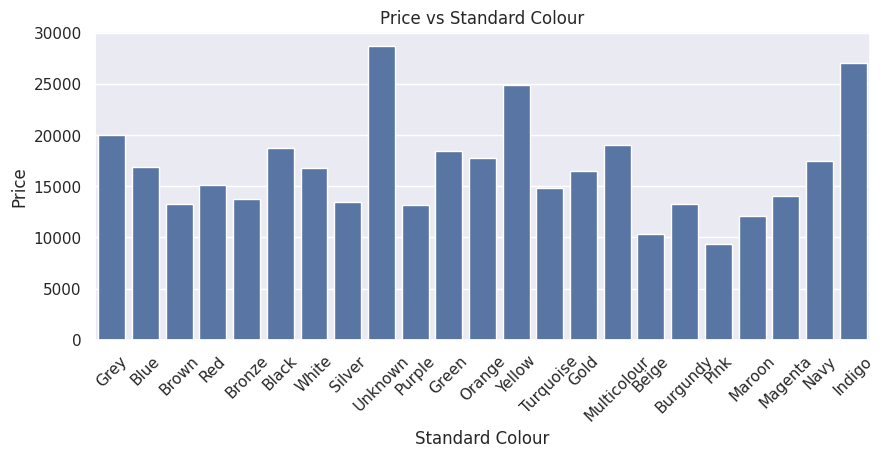

In [20]:
print("Unique colours:", df['standard_colour'].unique())
df['standard_colour'] = df['standard_colour'].fillna('Unknown')
# Categorical feature impact (e.g., on price)

plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='standard_colour', y='price', estimator='mean', ci=None)
plt.title(f'Price vs Standard Colour')
plt.xlabel('Standard Colour')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
plt.close()

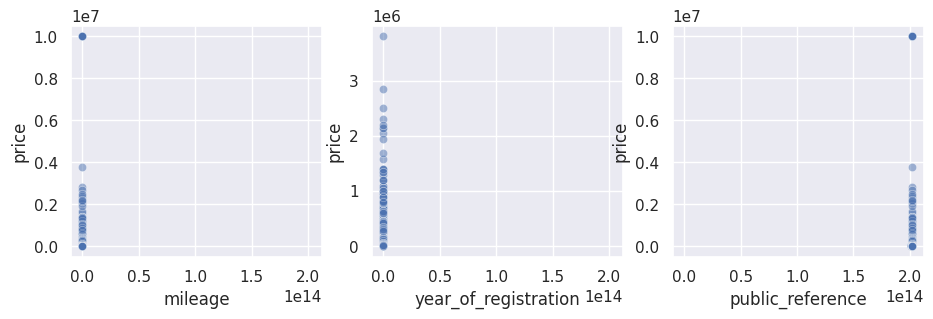

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11,3), sharex=True)
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.5, ax=axs[0])
sns.scatterplot(data=df, x='year_of_registration', y='price', alpha=0.5, ax=axs[1])
sns.scatterplot(data=df, x='public_reference', y='price', alpha=0.5, ax=axs[2]);
plt.show()

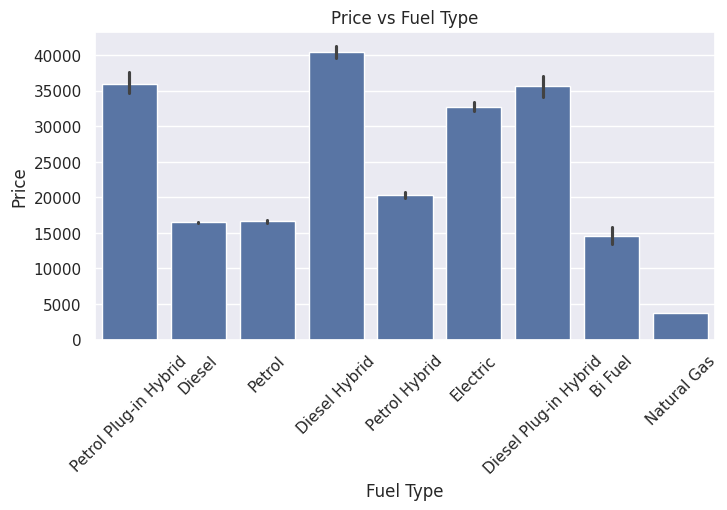

In [22]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='fuel_type', y='price', estimator='mean')
plt.title(f'Price vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
plt.close()

In [23]:
df.drop(df.loc[(df['year_of_registration'].isnull()) & (df['vehicle_condition'] == 'NEW') & (df['reg_code'].isnull())].index, inplace=True)

In [24]:
modes = (
    df.groupby(['standard_make', 'standard_model'])['standard_colour']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
)
modes.rename(columns={'standard_colour': 'mode_standard_colour'}, inplace=True)


In [25]:
modes.rename(columns={'standard_colour': 'mode_standard_colour'}, inplace=True)
df = df.merge(modes, on=['standard_make', 'standard_model'], how='left')

df['standard_colour'] = df['standard_colour'].fillna(df['mode_standard_colour'])

df.drop(columns=['mode_standard_colour'], inplace=True)

In [26]:
df['standard_colour'].fillna(df['standard_colour'].mode()[0], inplace=True)

In [27]:
#Columns standard_make and standard_model has relation with body_type.
modes = (
    df.groupby(['standard_make', 'standard_model'])['body_type']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)  # Calculate mode
    .reset_index()
)
modes.rename(columns={'body_type': 'mode_body_type'}, inplace=True)

In [28]:
modes.rename(columns={'body_type': 'mode_body_type'}, inplace=True)
df = df.merge(modes, on=['standard_make', 'standard_model'], how='left')

# fill missing values in 'body_type' with the computed mode
df['body_type'] = df['body_type'].fillna(df['mode_body_type'])

df.drop(columns=['mode_body_type'], inplace=True)

In [29]:
df['body_type'].fillna(df['body_type'].mode()[0], inplace=True)

In [30]:
#Columns standard_make, body_type and standard_model has relation with fuel_type.
modes = (
    df.groupby(['standard_make', 'standard_model', 'body_type'])['fuel_type']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)  # Calculate mode
    .reset_index()
)
modes.rename(columns={'fuel_type': 'mode_fuel_type'}, inplace=True)

In [31]:
modes.rename(columns={'fuel_type': 'mode_fuel_type'}, inplace=True)
df = df.merge(modes, on=['standard_make', 'standard_model', 'body_type'], how='left')

#fill missing values in 'fuel_type' with the computed mode
df['fuel_type'] = df['fuel_type'].fillna(df['mode_fuel_type'])

df.drop(columns=['mode_fuel_type'], inplace=True)

In [32]:
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)

In [33]:
def calculate_year(reg_code):
    if pd.isnull(reg_code) or not str(reg_code).isdigit():
        return None
    reg_code = int(reg_code)

    if reg_code <= 50:
        return 2000 + reg_code
    else:
        return 2000 + (reg_code - 50) + 1

df['calculated_year'] = df['reg_code'].apply(calculate_year)
df[['reg_code', 'calculated_year']]

,reg_code,calculated_year
0,61,2012.0
1,17,2017.0
2,16,2016.0
3,64,2015.0
4,17,2017.0
...,...,...
370751,69,2020.0
370752,59,2010.0
370753,62,2013.0
370754,65,2016.0


In [34]:
df.loc[
    df['reg_code'].notnull() & df['year_of_registration'].isnull() & df['reg_code'].apply(lambda x: str(x).isdigit()),
    'year_of_registration'
] = df['calculated_year']

In [35]:
df.drop(columns=['calculated_year'], inplace=True)

In [36]:
df['vehicle_condition'] = df['vehicle_condition'].map({ 'USED': 0, 'NEW': 1, np.NaN: 0} )

In [37]:
df['crossover_car_and_van'] = df['crossover_car_and_van'].replace({False: 0, True: 1})

In [38]:
def calculate_reg_code(year):
    if pd.isnull(year):
        return None
    year = int(year)
    if year >= 2001 and year <= 2050:
        if year % 2 == 0:
            return (year - 2000)
        else:
            return (year - 2000)
    return None


df.loc[df['reg_code'].isnull() & df['year_of_registration'].notnull(), 'reg_code'] = \
    df.loc[df['reg_code'].isnull() & df['year_of_registration'].notnull(), 'year_of_registration'].apply(calculate_reg_code)

In [39]:
str_reg_code_data = df[df['reg_code'].notnull() & ~df['reg_code'].apply(lambda x: str(x).isdigit()) & df['year_of_registration'].isnull()]

print("Rows where reg_code is a string and year_of_registration is null:")
print(str_reg_code_data[['reg_code', 'year_of_registration']].head(20))

Rows where reg_code is a string and year_of_registration is null:
       reg_code  year_of_registration
9284          B                   NaN
15343         P                   NaN
26131         E                   NaN
29157         R                   NaN
46315         R                   NaN
47034         L                   NaN
72686         E                   NaN
74717        CA                   NaN
78673         B                   NaN
88290         E                   NaN
97052         C                   NaN
111993        Y                   NaN
112290        L                   NaN
118278        R                   NaN
129956        E                   NaN
132772        M                   NaN
136414        J                   NaN
138068        H                   NaN
138836        S                   NaN
153244   723xuu                   NaN


In [40]:
character_reg_code_data = df[df['reg_code'].apply(lambda x: isinstance(x, str) and x.isalpha())]

In [41]:
def calculate_year_from_prefix(row):
    if pd.isnull(row['reg_code']) or not pd.isnull(row['year_of_registration']):
        return None
    reg_code = row['reg_code']
    if isinstance(reg_code, str) and re.match(r'^[A-Z]$', reg_code):
        if reg_code in 'ABCDEFGHJKLMNOPRSTVWXY':
            base_year = 1983 + (ord(reg_code) - ord('A'))
            return base_year
    return None

df['calculated_year_from_prefix'] = df.apply(calculate_year_from_prefix, axis=1)

df.loc[df['year_of_registration'].isnull() & df['calculated_year_from_prefix'].notnull(), 'year_of_registration'] = df['calculated_year_from_prefix']

In [42]:
df.drop(columns=['calculated_year_from_prefix'], inplace=True)

In [43]:
rows_to_delete = df.loc[df['mileage'].isnull() & (df['vehicle_condition'] == 0)]
df.drop(rows_to_delete.index, inplace=True)

In [44]:
df['year_of_registration'].fillna(df['year_of_registration'].mode()[0], inplace=True)

Dealing with outliers

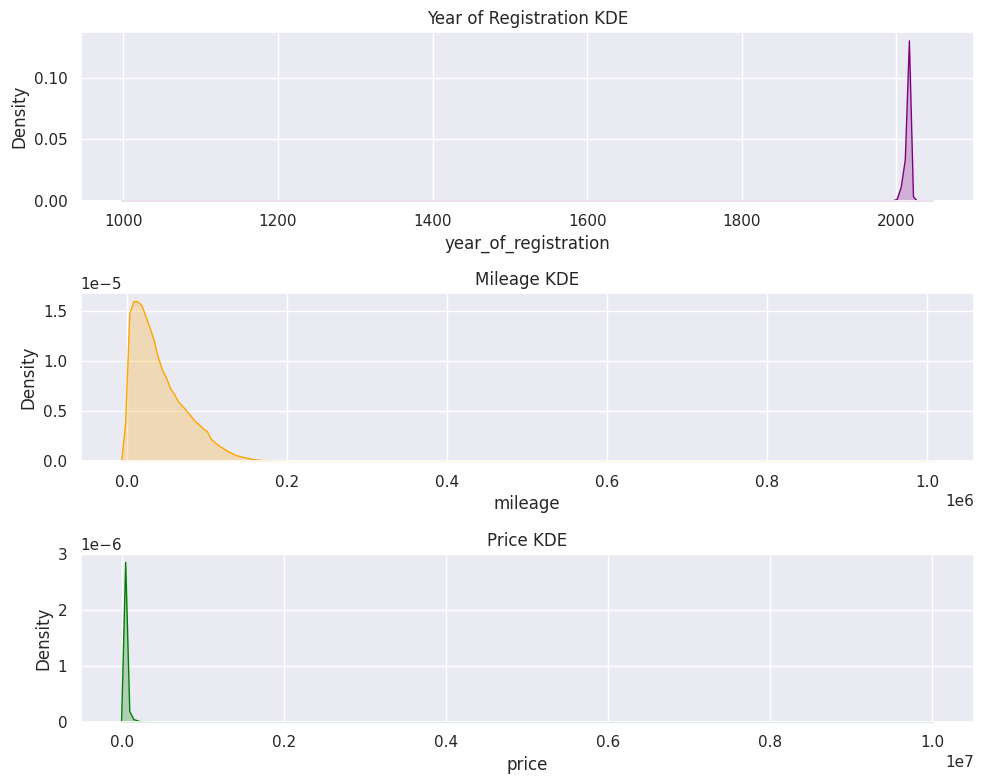

In [45]:
plt.figure(figsize=(10,8))

# Year of registration KDE plot
plt.subplot(3,1,1)
sns.kdeplot(df['year_of_registration'], shade=True, color='purple')
plt.title('Year of Registration KDE')

# Mileage KDE plot
plt.subplot(3,1,2)
sns.kdeplot(df['mileage'], shade=True, color='orange')
plt.title('Mileage KDE')

# Price KDE plot
plt.subplot(3,1,3)
sns.kdeplot(df['price'], shade=True, color='green')
plt.title('Price KDE')

plt.tight_layout()
plt.show()

In [46]:
for column in numeric_data:
    if column != 'public_reference':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [47]:
df.drop(columns=['crossover_car_and_van','public_reference'], inplace=True)

In [48]:
df.drop(columns=['reg_code'], inplace=True)

In [49]:
df

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type
0,108230.0,Blue,Jaguar,XF,0,2011.0,7000.0,Saloon,Diesel
1,7800.0,Grey,SKODA,Yeti,0,2017.0,14000.0,SUV,Petrol
2,45000.0,Brown,Vauxhall,Mokka,0,2016.0,7995.0,Hatchback,Diesel
3,64000.0,Grey,Land Rover,Range Rover Sport,0,2015.0,26995.0,SUV,Diesel
4,16000.0,Blue,Audi,S5,0,2017.0,29000.0,Convertible,Petrol
...,...,...,...,...,...,...,...,...,...
370751,5179.0,Grey,Peugeot,208,0,2019.0,10595.0,Hatchback,Petrol
370752,110000.0,Red,Peugeot,107,0,2009.0,2000.0,Hatchback,Petrol
370753,52760.0,White,Nissan,Qashqai,0,2012.0,7250.0,SUV,Petrol
370754,10250.0,Red,Abarth,595,0,2015.0,11490.0,Hatchback,Petrol


Feature Engineering, Data
Transformations, Feature Selection

In [50]:
df_encoded = pd.get_dummies(df['fuel_type'], prefix='fuel_type').astype(int)  # Convert to 0/1 explicitly

df[df_encoded.columns] = df_encoded


df.drop(columns=['fuel_type'], inplace=True)

In [51]:
df['price_category'] = np.random.choice([0, 1], size=len(df))

columns_to_encode = ['standard_colour', 'standard_make', 'standard_model', 'body_type']

# Sometime this doesn't work, so added alternative code for transformation
# encoder = TargetEncoder(cols=columns_to_encode)
# df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode], df['price_category'])

for col in columns_to_encode:
    mapping = df.groupby(col)['price_category'].mean().to_dict()
    df[col] = df[col].map(mapping)

df.drop(columns=['price_category'], inplace=True)

In [52]:
scaler = StandardScaler()

df[['mileage', 'price', 'year_of_registration']] = scaler.fit_transform(df[['mileage', 'price', 'year_of_registration']])

In [53]:
df

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Natural Gas,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid
0,2.075399,0.499134,0.492254,0.490781,0,-1.109733,-0.753393,0.497921,0,1,0,0,0,0,0,0,0
1,-0.999413,0.504085,0.501990,0.544350,0,0.476383,0.008814,0.499990,0,0,0,0,0,0,1,0,0
2,0.139520,0.500518,0.502079,0.479245,0,0.212030,-0.645051,0.501273,0,1,0,0,0,0,0,0,0
3,0.721233,0.504085,0.496014,0.494923,0,-0.052323,1.423797,0.499990,0,1,0,0,0,0,0,0,0
4,-0.748358,0.499134,0.501510,0.455189,0,0.476383,1.642115,0.504436,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370751,-1.079659,0.504085,0.500860,0.507477,0,1.005088,-0.361945,0.501273,0,0,0,0,0,0,1,0,0
370752,2.129590,0.500178,0.500860,0.507134,0,-1.638438,-1.297827,0.501273,0,0,0,0,0,0,1,0,0
370753,0.377104,0.499316,0.498155,0.503914,0,-0.845380,-0.726171,0.499990,0,0,0,0,0,0,1,0,0
370754,-0.924403,0.500178,0.472401,0.462322,0,-0.052323,-0.264492,0.501273,0,0,0,0,0,0,1,0,0


**3. Model Building**

In [54]:
X = df.drop(columns="price")
y = df["price"]

In [55]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [56]:
print("Shapes of datasets:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

Shapes of datasets:
X_train: (259440, 16) y_train: (259440,)
X_val: (55594, 16) y_val: (55594,)
X_test: (55595, 16) y_test: (55595,)


In [57]:
df.isna().sum().sum()

0

Linear Regression

In [58]:
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lr_rmse = np.sqrt(-lr_scores)
print(f"Cross-Validation RMSE: {lr_rmse}")
print(f"Mean RMSE: {lr_rmse.mean()}")

Cross-Validation RMSE: [0.75097766 0.75381969 0.75068267 0.76411839 0.76772401]
Mean RMSE: 0.7574644845136673


In [59]:
print("\n--- Validation Evaluation ---")
# Linear Regression
lr_model.fit(X_train, y_train)
lr_val_preds = lr_model.predict(X_val)
lr_val_rmse = np.sqrt(mean_squared_error(y_val, lr_val_preds))
print(f"Linear Regression Validation RMSE: {lr_val_rmse}")


--- Validation Evaluation ---
Linear Regression Validation RMSE: 0.7557435730854124


KNN

In [60]:
knn_model = KNeighborsRegressor()

knn_params = {
    'n_neighbors': [7],
    'weights': ['distance'],
    'metric': ['euclidean']
}

knn_grid = GridSearchCV(knn_model, knn_params, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
knn_grid.fit(X_train, y_train)

# Print results
print(f"Best Parameters: {knn_grid.best_params_}")
print(f"Best RMSE: {np.sqrt(-knn_grid.best_score_)}")

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best RMSE: 0.6606187091131223


In [61]:
knn_best = knn_grid.best_estimator_
knn_val_preds = knn_best.predict(X_val)
knn_val_rmse = np.sqrt(mean_squared_error(y_val, knn_val_preds))
print(f"KNN Validation RMSE: {knn_val_rmse}")

KNN Validation RMSE: 0.6495683754936715


Decision Tree Regressor

In [62]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_params = {
    'max_depth': [5, 10, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2]
}

dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)
print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Best RMSE: {np.sqrt(-dt_grid.best_score_)}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best RMSE: 0.2869858407152712


In [63]:
# Decision Tree
dt_best = dt_grid.best_estimator_
dt_val_preds = dt_best.predict(X_val)
dt_val_rmse = np.sqrt(mean_squared_error(y_val, dt_val_preds))
print(f"Decision Tree Validation RMSE: {dt_val_rmse}")

Decision Tree Validation RMSE: 0.27198089531092356


In [64]:
lr_r2 = r2_score(y_val, lr_val_preds)
lr_mse = mean_squared_error(y_val, lr_val_preds)
lr_mae = mean_absolute_error(y_val, lr_val_preds)
print("\n--- Linear Regression Metrics ---")
print(f"R² Score: {lr_r2}")
print(f"Mean Squared Error: {lr_mse}")
print(f"Mean Absolute Error: {lr_mae}")


--- Linear Regression Metrics ---
R² Score: 0.4288490837151727
Mean Squared Error: 0.571148348259906
Mean Absolute Error: 0.5647881829357163


In [65]:
# Example for KNN
knn_r2 = r2_score(y_val, knn_val_preds)
knn_mse = mean_squared_error(y_val, knn_val_preds)
knn_mae = mean_absolute_error(y_val, knn_val_preds)

print("\n--- KNN Metrics ---")
print(f"R² Score: {knn_r2}")
print(f"Mean Squared Error: {knn_mse}")
print(f"Mean Absolute Error: {knn_mae}")


--- KNN Metrics ---
R² Score: 0.5780590284155693
Mean Squared Error: 0.4219390744414875
Mean Absolute Error: 0.4292702599297193


In [66]:
dt_r2 = r2_score(y_val, dt_val_preds)
dt_mse = mean_squared_error(y_val, dt_val_preds)
dt_mae = mean_absolute_error(y_val, dt_val_preds)

print("\n--- Decision Tree Metrics ---")
print(f"R² Score: {dt_r2}")
print(f"Mean Squared Error: {dt_mse}")
print(f"Mean Absolute Error: {dt_mae}")


--- Decision Tree Metrics ---
R² Score: 0.9260260599821448
Mean Squared Error: 0.07397360741413156
Mean Absolute Error: 0.16786309940217872


**4. Model Evaluation and Analysis**

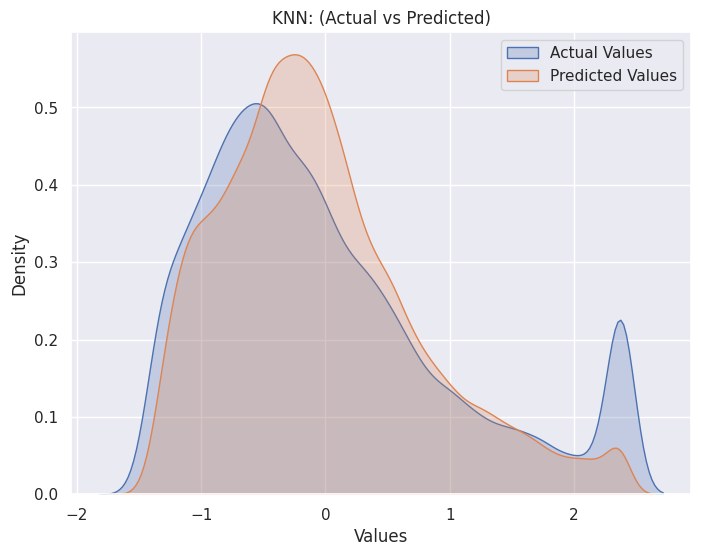

In [67]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_val, label="Actual Values", shade=True)
sns.kdeplot(knn_val_preds, label="Predicted Values", shade=True)
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("KNN: (Actual vs Predicted)")
plt.legend()
plt.show()

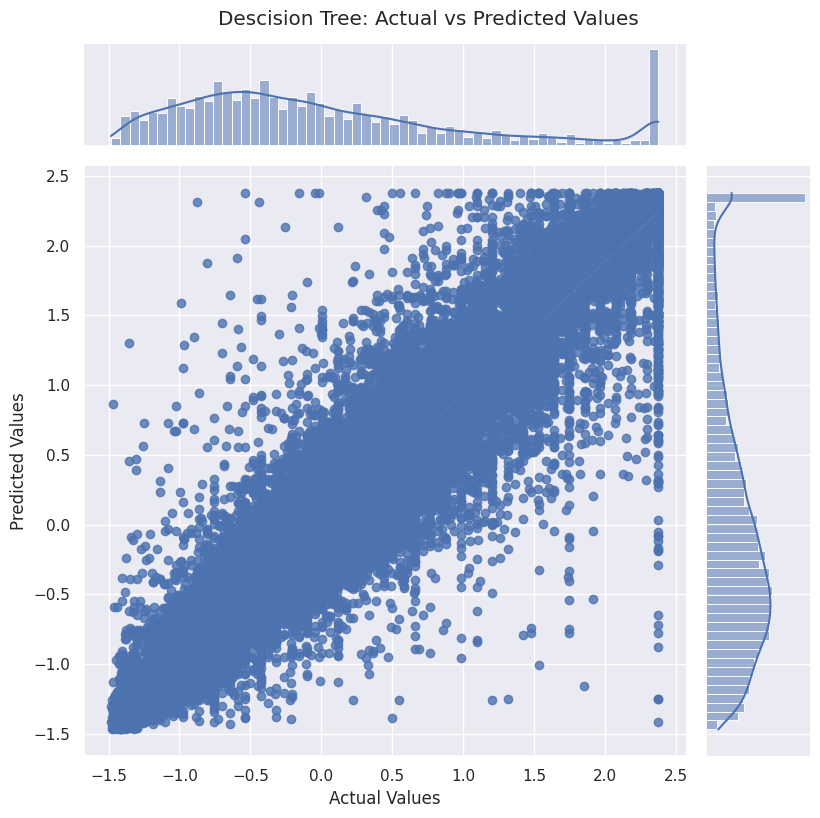

In [68]:
sns.jointplot(x=y_val, y=dt_val_preds, kind="reg", height=8)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.suptitle("Descision Tree: Actual vs Predicted Values", y=1.02)
plt.show()

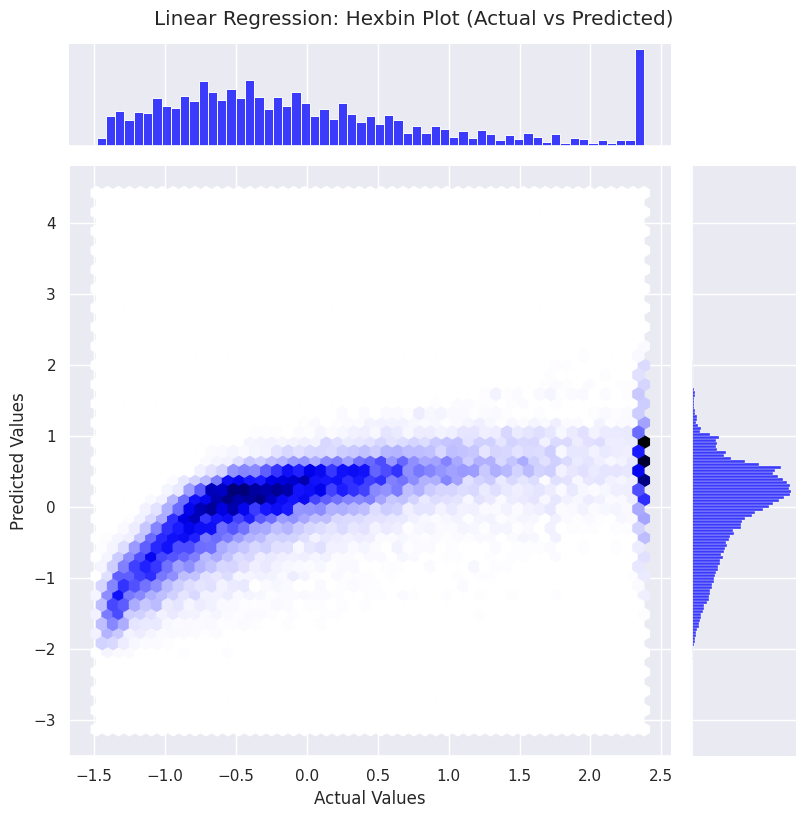

In [69]:
sns.jointplot(x=y_val, y=lr_val_preds, kind="hex", height=8, color="blue")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.suptitle("Linear Regression: Hexbin Plot (Actual vs Predicted)", y=1.02)
plt.show()


In [70]:
print("=== Feature Importance Analysis ===")
feature_importances = dt_best.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

=== Feature Importance Analysis ===


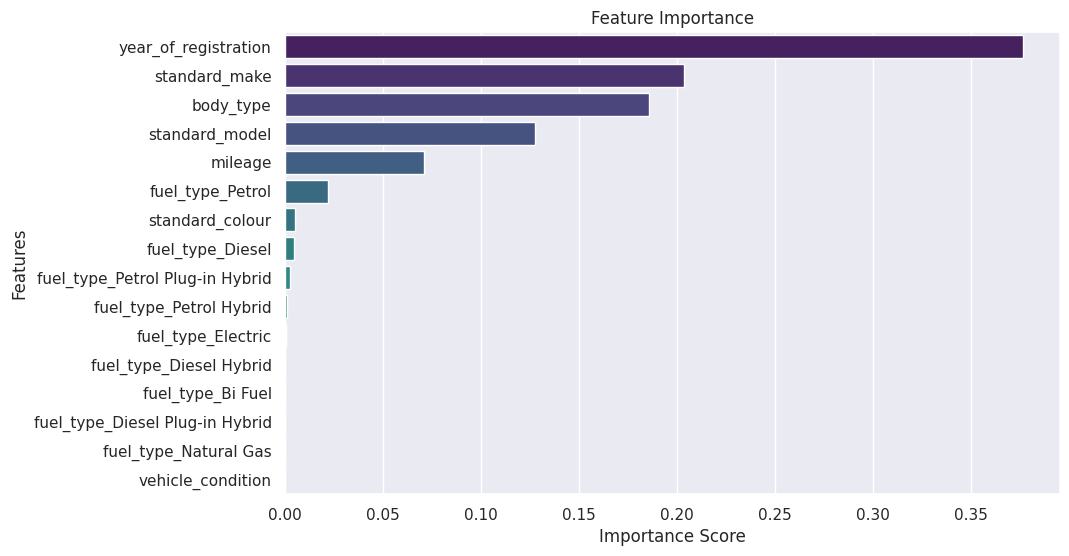

In [71]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns[sorted_idx],
    'Importance': feature_importances[sorted_idx]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Residuals of KNN

In [72]:
residuals = y_val - knn_val_preds

In [73]:
KNN_prediction_analysis = pd.DataFrame({
    'Actual': y_val,
    'Predicted': knn_val_preds,
    'Residual': residuals
}).reset_index(drop=True)

poor_predictions = KNN_prediction_analysis.assign(AbsResidual=np.abs(KNN_prediction_analysis['Residual'])) \
                                      .sort_values(by='AbsResidual', ascending=False) \
                                      .head(5)
print("Poor Predictions:\n", poor_predictions)

Poor Predictions:
          Actual  Predicted  Residual  AbsResidual
34403  2.377263  -1.350676  3.727939     3.727939
5856   2.377263  -1.329581  3.706844     3.706844
41149  2.377263  -1.302781  3.680044     3.680044
27597  2.377263  -1.190374  3.567637     3.567637
4784   2.377263  -1.187530  3.564794     3.564794


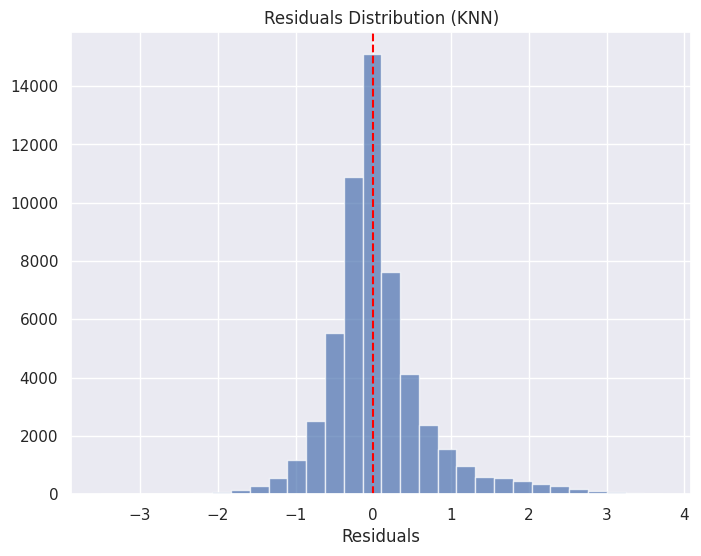

In [74]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.title("Residuals Distribution (KNN)")
plt.show()

Residuals of Linear Regression

In [75]:
residuals_lr = y_val - lr_val_preds

In [76]:
lr_prediction_analysis = pd.DataFrame({'Actual': y_val,'Predicted': lr_val_preds, 'Residual': residuals_lr}).reset_index(drop=True)

poor_predictions = lr_prediction_analysis.assign(AbsResidual=np.abs(lr_prediction_analysis['Residual'])) \
                                      .sort_values(by='AbsResidual', ascending=False) \
                                      .head(5)
print("Poor Predictions:\n", poor_predictions)

Poor Predictions:
          Actual  Predicted  Residual  AbsResidual
10961  2.377263  -2.397217  4.774480     4.774480
8860   2.377263  -1.745315  4.122578     4.122578
35517  2.377263  -1.669102  4.046366     4.046366
17389  2.377263  -1.617491  3.994754     3.994754
52420  2.377263  -1.551441  3.928704     3.928704


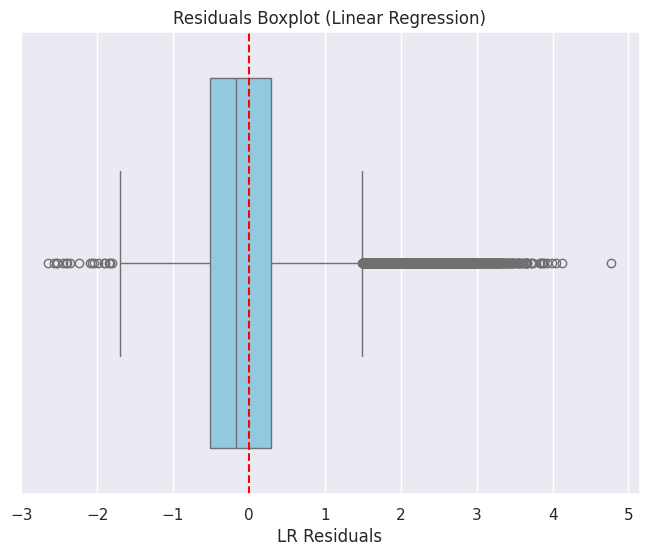

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=residuals_lr, color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("LR Residuals")
plt.title("Residuals Boxplot (Linear Regression)")
plt.show()

Residuals of Decision Tree Regressor

In [78]:
residuals_dt = y_val - dt_val_preds

In [79]:
if isinstance(residuals_dt, pd.DataFrame):
    residuals_dt = residuals_dt.values.flatten()

residuals_dt_df = pd.DataFrame({
    'Actual': y_val,
    'Predicted': dt_val_preds,
    'Residual': residuals_dt
}).reset_index(drop=True)

poor_predictions = residuals_dt_df.assign(AbsResidual=np.abs(residuals_dt_df['Residual'])) \
                                  .sort_values(by='AbsResidual', ascending=False) \
                                  .head(5)

print("Poor Predictions:\n", poor_predictions)

Poor Predictions:
          Actual  Predicted  Residual  AbsResidual
33334  2.377263  -1.415984  3.793248     3.793248
40695  2.377263  -1.249294  3.626558     3.626558
8132   2.377263  -1.249294  3.626558     3.626558
5987   2.377263  -0.874530  3.251793     3.251793
25293 -0.873168   2.313649 -3.186818     3.186818


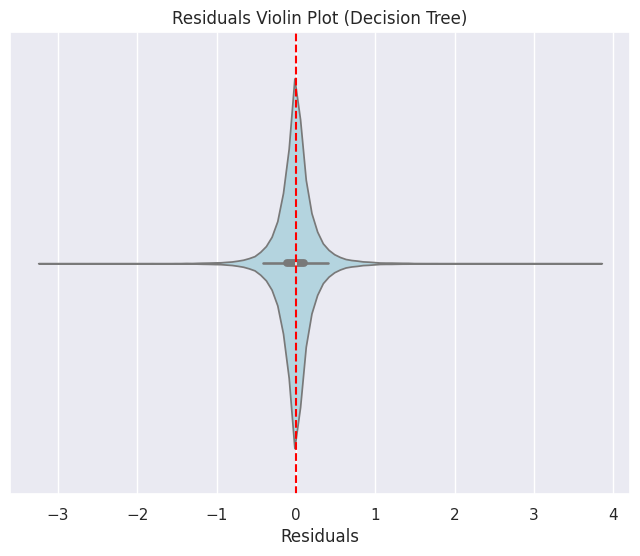

In [80]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=residuals_dt, color='lightblue')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.title("Residuals Violin Plot (Decision Tree)")
plt.show()